We have a dataset consisting of text reviews sourced from Amazon, accompanied by corresponding ratings assigned by users. These ratings range from 1, indicating a low score, to 5, representing the highest rating. The task at hand involves multi-class classification, where the goal is to predict the user-assigned rating scores, which serve as the classes {1, 2, 3, 4, 5}.

# Data Exploration and Visualisation

In this section, we employed statistical analysis and created plots such as bar charts and box plots to uncover insights into the reviews and their associated ratings.

By running statistical code on the dataset, we aimed to extract meaningful information and understand patterns within the reviews and their corresponding ratings. Through visualisations like bar charts and box plots, we sought to illustrate the distribution and relationships between the review length and their ratings.


In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/F20AA_CW2/train.csv')
train.dropna(subset=['Review'], inplace=True)
train['Review_Length'] = train['Review'].apply(lambda x: len(str(x)))

Mounted at /content/drive


In [ ]:
train['Review_Length']

0         181
1          57
2         318
3          28
4          45
         ... 
370858     59
370859    138
370860    243
370861    143
370862    324
Name: Review_Length, Length: 370863, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def print_statistics():
    # Print summary statistics of the 'overall' and 'Review Length' columns
    print("Rating Statistics:")
    print(train['overall'].describe())

    print("\nReview Length Statistics:")
    print(train['Review_Length'].describe())

    # Group the data by rating and calculate the median review length for each rating
    median_review_length_by_rating = train.groupby('overall')['Review_Length'].median()

    # Print the result
    print("\nMedian Review Length by Rating:")
    print(median_review_length_by_rating)

    # Group the data by rating and calculate the mean review length for each rating
    mean_review_length_by_rating = train.groupby('overall')['Review_Length'].mean()

    # Print the result
    print("\nMean Review Length by Rating:")
    print(mean_review_length_by_rating)

    # Group the data by rating and calculate the interquartile range for each rating
    iqr_review_length_by_rating = train.groupby('overall')['Review_Length'].apply(lambda x: (x.quantile(0.25), x.quantile(0.75), x.quantile(0.75) - x.quantile(0.25)))

    # Print the result
    print("\nInterquartile Range (IQR) of Review Length by Rating: lower bound, upper bound, IQR range")
    print(iqr_review_length_by_rating)


def plot_review_lengths_distribution(xlim=20000, bins_size=100):
    # Calculate the length of each review
    train['Review_Length'] = train['Review'].apply(lambda x: len(str(x)))

    # Plot the distribution of review lengths
    plt.figure(figsize=(10, 4))
    plt.hist(train['Review_Length'], bins=bins_size, color='skyblue', edgecolor='black')
    plt.title('Distribution of Review Lengths')
    plt.xlabel('Review Length')
    plt.ylabel('Frequency')
    plt.xlim(0, xlim)
    plt.grid(True)
    plt.show()

def plot_rating_vs_review_length_distribution(ylim=20000):
    # Create a boxplot for Rating vs Review Length
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='overall', y='Review_Length', data=train, hue='overall', palette='Set2', legend=False)
    plt.title('Rating vs Review Length Distribution')
    plt.xlabel('Rating')
    plt.ylabel('Review Length')
    plt.ylim(0, ylim)
    plt.grid(True)
    plt.show()

def plot_frequency_of_ratings():
    plt.figure(figsize=(10, 4))
    sns.countplot(x='overall', data=train, hue='overall', palette='Set2', legend=False)
    plt.title('Frequency of Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
print_statistics()

Rating Statistics:
count    370863.000000
mean          4.566600
std           0.930377
min           1.000000
25%           5.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

Review Length Statistics:
count    370863.000000
mean        165.915112
std         302.338133
min           1.000000
25%          30.000000
50%          82.000000
75%         185.000000
max       19323.000000
Name: Review_Length, dtype: float64

Median Review Length by Rating:
overall
1    155.0
2    159.0
3    134.0
4    113.0
5     70.0
Name: Review_Length, dtype: float64

Mean Review Length by Rating:
overall
1    255.339120
2    263.364609
3    239.216581
4    218.573355
5    145.120364
Name: Review_Length, dtype: float64

Interquartile Range (IQR) of Review Length by Rating: lower bound, upper bound, IQR range
overall
1    (70.0, 317.0, 247.0)
2    (74.0, 318.0, 244.0)
3    (58.0, 275.0, 217.0)
4    (40.0, 245.0, 205.0)
5    (26.0, 161.0, 135.0)
Name

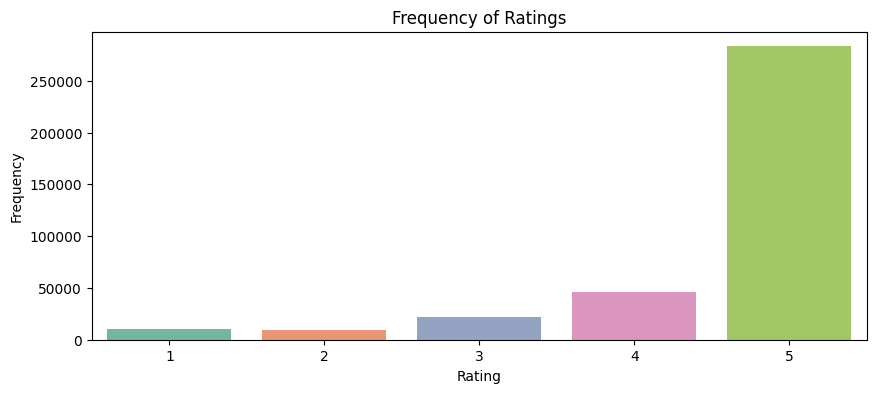

In [ ]:
plot_frequency_of_ratings()

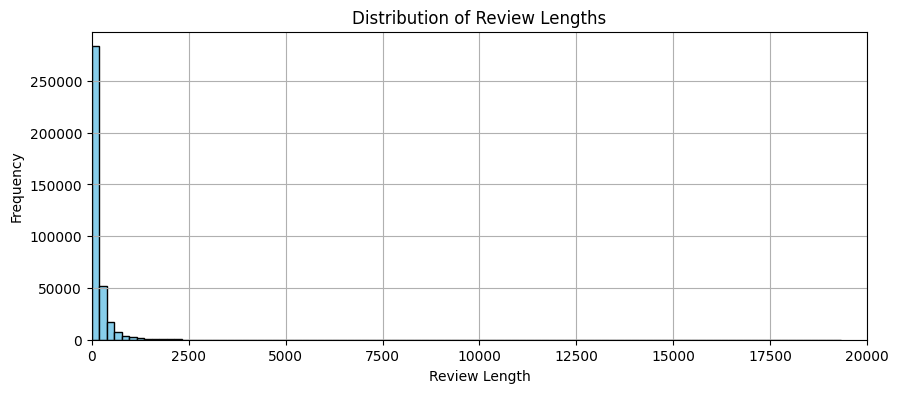

In [ ]:
plot_review_lengths_distribution()

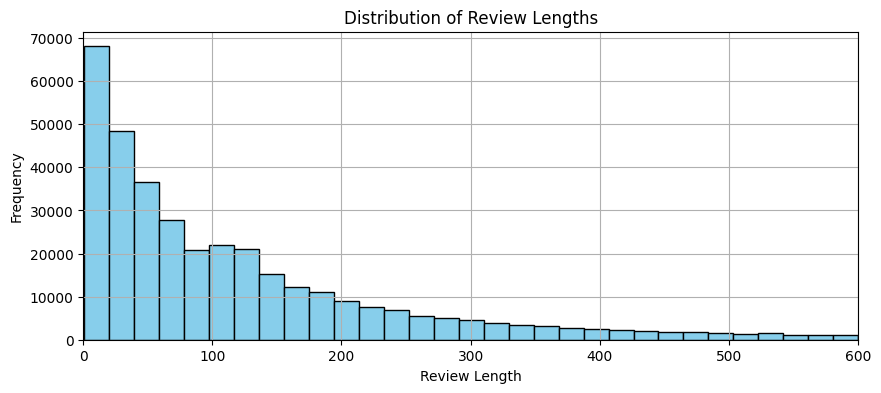

In [ ]:
plot_review_lengths_distribution(600, 1000)

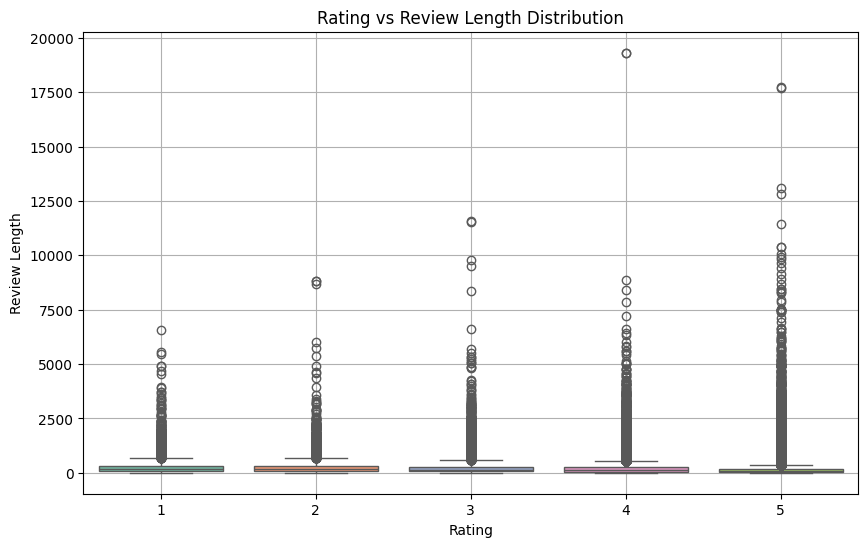

In [ ]:
plot_rating_vs_review_length_distribution()

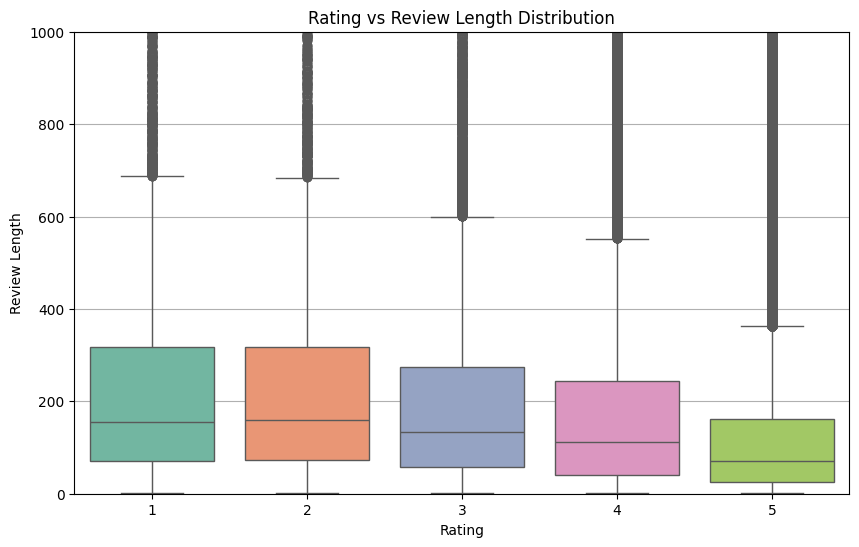

In [ ]:
plot_rating_vs_review_length_distribution(1000)

## Rating

```
Rating Statistics:
count    370855.000000
mean          4.566593
std           0.930385
min           1.000000
25%           5.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64
```

* The majority of ratings fall within the 25th to 75th percentiles (quartiles), with most ratings being 5 (the 75th percentile). This indicates that a significant portion of products receive high ratings.
* The average rating is approximately 4.57 out of 5. This indicates that, on average, the products are highly rated.
* The standard deviation is 0.93 (less than 1), indicating that the majority of ratings are relatively close to the mean rating.

## Review Length

```
Review Length Statistics:
count    370855.000000
mean        165.918604
std         302.340459
min           1.000000
25%          30.000000
50%          82.000000
75%         185.000000
max       19323.000000
Name: Review_Length, dtype: float64
```

* Most reviews are short, clustering near the lower end: The median review length is 82 characters, and the 75th percentile is 185 characters. This means that half of all reviews are shorter than 82 characters, and only 25% of reviews are longer than 185 characters.
* The standard deviation of around 302 suggests considerable variability in the lengths of reviews. Some reviews are significantly longer than average, scattering far to the right of the plot.

## Rating vs. Review Length

```
Median Review Length by Rating:
overall
1    155.0
2    159.0
3    134.0
4    113.0
5     70.0
Name: Review_Length, dtype: float64
```

```
Mean Review Length by Rating:
overall
1    255.339120
2    263.364609
3    239.216581
4    218.578037
5    145.123853
Name: Review_Length, dtype: float64
```

* Reviews for lower-rated products tend to be longer. The lower bound of review lengths generally increases as the rating decreases. For example, for a rating of 1, the lower bound of review lengths is 70.0, while for a rating of 5, it is 26.0.
* This suggests that lower ratings tend to have longer reviews compared to higher ratings. Similarly, the upper bound of review lengths also increases as the rating decreases.

# Text Processing and Normalisation

In this section, we experimented with various text preprocessing techniques. These techniques included expanding contractions, removing punctuation, converting text to lowercase, and replacing links with a placeholder. Additionally, we explored normalisation techniques such as stemming and lemmatisation, testing different combinations to determine the most effective preprocessing approach for our subsequent steps.

To evaluate the performance of each combination of techniques, we split our training dataset into 75% for training and 25% for testing. We used the stratify parameter to ensure that the distribution of ratings remained balanced, as observed during our previous data exploration. Subsequently, we employed the `model.score` method to assess the performance of each combination on both the training and testing datasets.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
# !unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
!pip install contractions
!pip install emot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 1.8 MB/s eta 0:00:00


In [ ]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pandas as pd
import contractions
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import time

class TextNormalizer(TransformerMixin):
    def __init__(self, expand_contractions=True, lemmatize=True, remove_punctuation=True, convert_to_lowercase=True, replace_links=True, stem=True):
            self.expand_contractions_flag = expand_contractions
            self.lemmatize_flag = lemmatize
            self.stem_flag = stem
            self.remove_punctuation_flag = remove_punctuation
            self.convert_to_lowercase_flag = convert_to_lowercase
            self.replace_links_flag = replace_links
            self.lemmatizer = WordNetLemmatizer()
            self.stemmer = PorterStemmer()

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, **transform_params):
        normalized_text = []
        for text in X:
            if self.expand_contractions_flag:
                text = self.expand_contractions(text)
            if self.remove_punctuation_flag:
                text = self.remove_punctuation(text)
            if self.convert_to_lowercase_flag:
                text = self.convert_to_lowercase(text)
            if self.replace_links_flag:
                text = self.replace_links(text)
            if self.stem_flag:
                text = self.stem_text(text)
            if self.lemmatize_flag:
                text = self.lemmatize_text(text)
            normalized_text.append(text)
        return normalized_text

    def expand_contractions(self, text):
        words = text.split()
        for i, word in enumerate(words):
            # Expand the contraction
            expanded_word = contractions.fix(word)

            # Check if the word is a contraction
            if expanded_word != word:
                # Replace the contraction with its expansion
                words[i] = expanded_word

        # Join the modified words back into a review
        modified_review = ' '.join(words)
        return modified_review

    def lemmatize_text(self, text):
        tokens = word_tokenize(text)
        lemmatized_tokens = [self.lemmatizer.lemmatize(token) for token in tokens]
        return ' '.join(lemmatized_tokens)

    def remove_punctuation(self, text):
        translator = str.maketrans('', '', string.punctuation)
        return text.translate(translator)

    def convert_to_lowercase(self, text):
        return text.lower()

    def replace_links(self, text):
        link_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
        return re.sub(link_pattern, '[link]', text)

    def stem_text(self, text):
        tokens = word_tokenize(text)
        stemmed_tokens = [self.stemmer.stem(token) for token in tokens]
        return ' '.join(stemmed_tokens)

class CustomTfidfVectorizer(TfidfVectorizer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
    def fit_transform(self, raw_documents, y=None):
        # Call the transform method of the parent class
        X = super().fit_transform(raw_documents, y)
        # Do any additional processing here if needed
        return X

def tn_pipeline(x_train, y_train, x_test, y_test, text_normalizer_params=None, tfidf_params=None):
    start = time.time()
    print("text normaliser params ：",text_normalizer_params)
    if text_normalizer_params is None:
        text_normalizer_params = {}
    if tfidf_params is None:
        tfidf_params = {}

    steps = [
        ('normalise', TextNormalizer(**text_normalizer_params)),
        ('vectorise', CustomTfidfVectorizer(**tfidf_params)),  # Pass params to CustomTfidfVectorizer
        ('regression', LogisticRegression(max_iter=10000, tol=1e-4))
    ]

    model = Pipeline(steps)
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print("train score: ", train_score, "test score", test_score)
    end=time.time()
    print("Time taken: ",end-start)
    print("==="*200)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.model_selection import train_test_split

train = pd.read_csv('/kaggle/input/f20f21-aa-2023-2024-cw2/train.csv')
train.dropna(subset=['Review'], inplace=True)


X = train['Review']
y = train['overall']

# Split the data into training and testing sets, ensuring stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10, stratify=y)

tn_pipeline(X_train, y_train, X_test, y_test,text_normalizer_params={},tfidf_params={})
tn_pipeline(X_train, y_train, X_test, y_test,text_normalizer_params={'stem':False},tfidf_params={})
tn_pipeline(X_train, y_train, X_test, y_test,text_normalizer_params={'stem':False, 'lemmatize':False},tfidf_params={})
tn_pipeline(X_train, y_train, X_test, y_test,text_normalizer_params={'stem':False, 'lemmatize':False,'expand_contractions':False},tfidf_params={})
tn_pipeline(X_train, y_train, X_test, y_test,text_normalizer_params={'stem':False, 'lemmatize':False,'expand_contractions':False, 'remove_punctuation':False},tfidf_params={})
tn_pipeline(X_train, y_train, X_test, y_test,text_normalizer_params={'stem':False, 'lemmatize':False,'expand_contractions':False, 'remove_punctuation':False, 'convert_to_lowercase':False},tfidf_params={})

text normaliser params ： {}
train score:  0.8135086842568857 test score 0.7969713965227145
Time taken:  1073.4121086597443
text normaliser params ： {'stem': False}
train score:  0.8167623594717901 test score 0.7985353121359852
Time taken:  511.18860721588135
text normaliser params ： {'stem': False, 'lemmatize': False}
train score:  0.8196205603511812 test score 0.7997864446266016
Time taken:  260.6156723499298
text normaliser params ： {'stem': False, 'lemmatize': False, 'expand_contractions': False}
train score:  0.8199441302620557 test score 0.800120798999094
Time taken:  193.19817686080933
text normaliser params ： {'stem': False, 'lemmatize': False, 'expand_contractions': False, 'remove_punctuation': False}
train score:  0.8185707557514552 test score 0.7999482290003883
Time taken:  172.53948760032654
text normaliser params ： {'stem': False, 'lemmatize': False, 'expand_contractions': False, 'remove_punctuation': False, 'convert_to_lowercase': False}
train score:  0.8185707557514552 te

TypeError: TextNormalizer.__init__() got an unexpected keyword argument 'replace_link'

In [ ]:
tn_pipeline(X_train, y_train, X_test, y_test,text_normalizer_params={'stem':False, 'lemmatize':False,'expand_contractions':False, 'remove_punctuation':False, 'convert_to_lowercase':False,'replace_links':False},tfidf_params={})

text normaliser params ： {'stem': False, 'lemmatize': False, 'expand_contractions': False, 'remove_punctuation': False, 'convert_to_lowercase': False, 'replace_links': False}
train score:  0.818577946193919 test score 0.7999913715000647
Time taken:  180.9640064239502


## Results

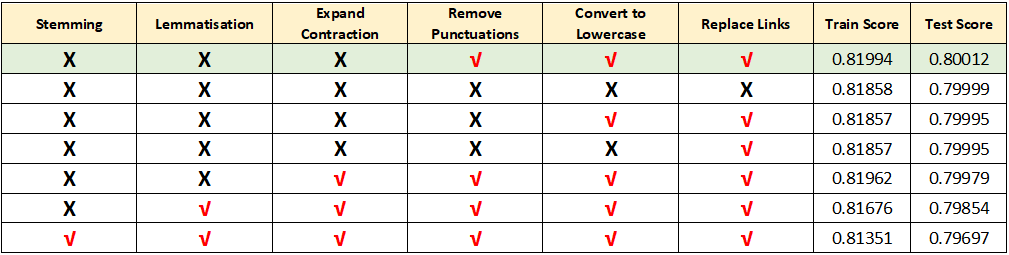

**Analysis**

*  Minor Accuracy Difference with Preprocessing and Normalisation
  > There is only a 0.005 difference in train score and a 0.003 difference in test score. This suggests that the dataset is already well-written, with minimal contractions, punctuation errors, and insignificant amounts of links, leading to similar performance with or without preprocessing.

*  Minor Improvementt without Stemming and Lemmatisation
   * The accuracy scores show improvement when normalization techniques such as stemming and lemmatization are removed from the pipeline. Specifically, when stemming is removed, both the training and testing scores increase by 0.003 and 0.002, respectively.
  *  Similarly, removing lemmatization leads to a training score increase of 0.003 and a testing score increase of 0.001. This improvement can be attributed to the preservation of brand names (i.e., "DCWV Cardstock", "Silhouette Cameo 2") prevalent in the reviews.
  * Stemming and lemmatisation may inadvertently reduce brand names to their root forms, introducing noise into the semantics of the text.
  * The mean review lengths are around 200, hence the benefit of stemming and lemmatisation becomes limited.

*   Minor Improvement with Punctuation and Link Removal
 > Both punctuation and link removal contribute positively to the accuracy scores, with an improvement of +0.001 observed in both cases. This improvement suggests that the presence of punctuation marks and hyperlinks in the text introduces noise, albeit not significantly altering the semantics. Removing these elements helps streamline the text and enhance the model's ability to extract meaningful information.

*   No Difference with Lowercase Conversion

In conclusion, the effectiveness of text preprocessing techniques can vary depending on the domain of the dataset. In our analysis of Amazon product reviews, we observed that certain techniques like stemming and lemmatisation may not be well-suited due to the short length of reviews and prevalence of brand names and specialised terminology. Therefore, it's essential to tailor preprocessing strategies to the specific characteristics of the dataset.

Based on the experimental results above, we will continue our subsequent steps with the text preprocessing and normalisation of removing punctuation, converting to lowercase, and replacing links with a placeholder.

In [ ]:
import pandas as pd
import re
import string

class TextPreprocessor:
    def __init__(self):
        pass

    def remove_punctuation(self, text):
        translator = str.maketrans('', '', string.punctuation)
        return text.translate(translator)

    def convert_to_lowercase(self, text):
        return text.lower()

    def replace_links(self, text):
        link_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
        return re.sub(link_pattern, '[link]', text)

def preprocess_train_data(input_file, output_file):
    # Read the input train CSV file
    train_df = pd.read_csv(input_file)

    # Initialise the TextPreprocessor
    preprocessor = TextPreprocessor()

    # Preprocess the reviews
    train_df['Preprocessed_Review'] = train_df['Review'].apply(preprocessor.remove_punctuation)
    train_df['Preprocessed_Review'] = train_df['Preprocessed_Review'].apply(preprocessor.convert_to_lowercase)
    train_df['Preprocessed_Review'] = train_df['Preprocessed_Review'].apply(preprocessor.replace_links)

    # Save the preprocessed data to a new CSV file
    train_df.to_csv(output_file, index=False)

In [ ]:
preprocess_train_data('/content/drive/MyDrive/Colab Notebooks/F20AA_CW2/train.csv', 'preprocessed_train.csv')

In [ ]:
preprocess_train_data('/content/drive/MyDrive/Colab Notebooks/F20AA_CW2/test.csv', 'preprocessed_test.csv')

# Vector Space Model and Feature Representation

In this section, we explored methods for representing text as vectors in a high-dimensional space. Each dimension in this space corresponds to a unique term present in the vocabulary. The methods explored include Term Frequency (TF), Term Frequency-Inverse Document Frequency (TF-IDF), Bag-of-Words (BoW), N-gram Features, and Word Embeddings.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/F20AA_CW2/preprocessed_train.csv')

Mounted at /content/drive


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370863 entries, 0 to 370862
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   overall              370863 non-null  int64 
 1   Review               370863 non-null  object
 2   Preprocessed_Review  370636 non-null  object
dtypes: int64(1), object(2)
memory usage: 8.5+ MB


After running the `info()` function on the new train.csv file, it was observed that some of the reviews became `NaN` after preprocessing. To address this issue, these NaN values were replaced with empty strings.

In [ ]:
train.fillna("", inplace=True)

## Feature Representation

We conduct experiments focusing on `representation` techniques, exploring different aspects such as vectoriser parameters, types of representation, and n-gram features. We use `LogisticRegression` as our base model to evaluate the performance of these techniques. Our objective is to identify the best-performing vectoriser that will serve as the fixed representation method for subsequent `Bag-of-Words (BoW)` model training.

In [ ]:
from sklearn.model_selection import train_test_split
X = train['Preprocessed_Review']
y = train['overall']

# Split the data into training and testing sets, ensuring stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10, stratify=y)

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

def vectorizer(title, vect):
  X_train_CV = vect.fit_transform(X_train)
  X_test_CV = vect.transform(X_test)

  model = LogisticRegression()
  model.fit(X_train_CV, y_train)
  y_pred = model.predict(X_test_CV)
  train_score = model.score(X_train_CV, y_train)
  test_score = model.score(X_test_CV, y_test)

  print(title)
  print(X_train_CV.shape)
  print("Train Score: ", train_score)
  print("Test Score: ", test_score)
  print("="*60)

### Vectoriser Parameters

To determine the optimal parameters for the vectoriser, we conducted an exploration of various parameters such as `stop_words`, `min_df`, and `max_df`. This exploration aimed to identify the combination of techniques that yielded the best performance. Throughout this process, we utilised `CountVectorizer` as the foundation for our vectorisation approach.


In [ ]:
vect = CountVectorizer()
vectorizer("Default CountVectorizer", vect)

vect = CountVectorizer(stop_words="english")
vectorizer("CountVectorizer with Stopword Removal", vect)

vect = CountVectorizer(min_df=5)
vectorizer("CountVectorizer with min_df=5", vect)

vect = CountVectorizer(max_df=0.9)
vectorizer("CountVectorizer with max_df=0.9", vect)

vect = CountVectorizer(stop_words="english", min_df=5)
vectorizer("CountVectorizer with Stopword Removal and min_df=5", vect)

vect = CountVectorizer(stop_words="english", max_df=0.90)
vectorizer("CountVectorizer with Stopword Removal and max_df=0.9", vect)

vect = CountVectorizer(stop_words="english", max_df=0.9, min_df=5)
vectorizer("CountVectorizer with Stopword Removal, Min_DF=5, max_df=0.9", vect)

Default CountVectorizer
(278147, 72631)
Train Score:  0.8072601897557766
Test Score:  0.7941887052935848
CountVectorizer with Stopword Removal
(278147, 72326)
Train Score:  0.8272999529026018
Test Score:  0.7898528840761033
CountVectorizer with min_df=5
(278147, 17493)
Train Score:  0.8065878833854041
Test Score:  0.7943828465421287
CountVectorizer with max_df=0.9
(278147, 72631)
Train Score:  0.8072601897557766
Test Score:  0.7941887052935848
CountVectorizer with Stopword Removal and min_df=5
(278147, 17195)
Train Score:  0.8201202961024207
Test Score:  0.7889253203330601
CountVectorizer with Stopword Removal and max_df=0.9
(278147, 72326)
Train Score:  0.8272999529026018
Test Score:  0.7898528840761033
CountVectorizer with Stopword Removal, Min_DF=5, max_df=0.9
(278147, 17195)
Train Score:  0.8201202961024207
Test Score:  0.7889253203330601


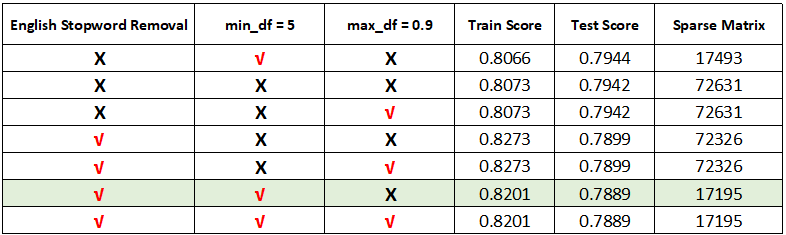

After analysing the results presented in the provided table, it's clear that the vectoriser with the parameter `min_df=5` achieved the highest performance, evidenced by the highest test score while maintaining a relatively low size of the sparse matrix.

However, considering the potential increase in matrix size due to the application of n-gram features in later stages, we opted to use the vectoriser with `stop_words="english"` and `min_df=5`. This choice resulted in a smaller sparse matrix size while still demonstrating comparable performance to the highest-scoring configuration, with only a marginal difference of `0.005` in the test score.

Consequently, for our subsequent experiments, we have decided to stick with the vectoriser employing `stop_words="english"` and `min_df=5`.

### Frequency vs. TD-IDF vs. Binary

In order to identify the most effective document representation method for our dataset, we conducted experiments using three different approaches. These included the binary representation using `CountVectorizer` with the parameter `binary=True`, the frequency-based representation using the default `CountVectorizer`, and the Term Frequency-Inverse Document Frequency (TF-IDF) representation using `TfidfVectorizer`, all with no additional parameters.

In [ ]:
vect = TfidfVectorizer(stop_words="english", min_df=5)
vectorizer("TfidfVectorizer", vect)

vect = CountVectorizer(binary=True, stop_words="english", min_df=5)
vectorizer("Binary", vect)

TfidfVectorizer
(278147, 17195)
Train Score:  0.8013496460504698
Test Score:  0.7899283834505372
Binary
(278147, 17195)
Train Score:  0.8219215019396219
Test Score:  0.7898636697010225


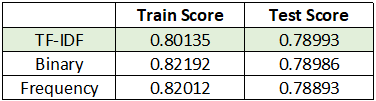

The table above illustrates that the three types of text representation exhibit comparable performance, with minimal differences in test scores.

In order to explore additional possibilities, we have chosen to utilize `TfidfVectorizer(stop_words="english", min_df=5)` and `CountVectorizer(binary=True, stop_words="english", min_df=5)` for our subsequent stage, enabling further comparison.

### N-gram Features

In our exploration of n-gram features, we conducted experiments with various ranges of n-values to identify the best-performing n-gram for our dataset. Our experimentation included ranges from `(1, 1)` to `(3, 3)`, encompassing unigrams, bigrams, and trigrams.


In [ ]:
ngram_range = [(1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3)]
for i in ngram_range:
  vect = TfidfVectorizer(stop_words="english", min_df=5, ngram_range=i)
  vectorizer(i, vect)

(1, 1)
(278147, 17195)
Train Score:  0.8013496460504698
Test Score:  0.7899283834505372
(1, 2)
(278147, 127803)
Train Score:  0.8210191014104052
Test Score:  0.796518400276112
(1, 3)
(278147, 155867)
Train Score:  0.8246430844121994
Test Score:  0.7982872427628457
(2, 2)
(278147, 110608)
Train Score:  0.8108230539966277
Test Score:  0.7837805772466456
(2, 3)
(278147, 138672)
Train Score:  0.8103628656789396
Test Score:  0.7839639328702706
(3, 3)
(278147, 28064)
Train Score:  0.7775097340614855
Test Score:  0.7687238448595711


In [ ]:
ngram_range = [(1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3)]
for i in ngram_range:
  vect = CountVectorizer(stop_words="english", min_df=5, ngram_range=i)
  vectorizer(i, vect)

(1, 1)
(278147, 17195)
Train Score:  0.8201202961024207
Test Score:  0.7889253203330601
(1, 2)
(278147, 127803)
Train Score:  0.8984026432066498
Test Score:  0.8048556883385823
(1, 3)
(278147, 155867)
Train Score:  0.9023501961193182
Test Score:  0.8056106820829199
(2, 2)
(278147, 110608)
Train Score:  0.8768564823636422
Test Score:  0.7906402346951983
(2, 3)
(278147, 138672)
Train Score:  0.8872898143787278
Test Score:  0.7934552827990854
(3, 3)
(278147, 28064)
Train Score:  0.7842471786501383
Test Score:  0.7695866948530998


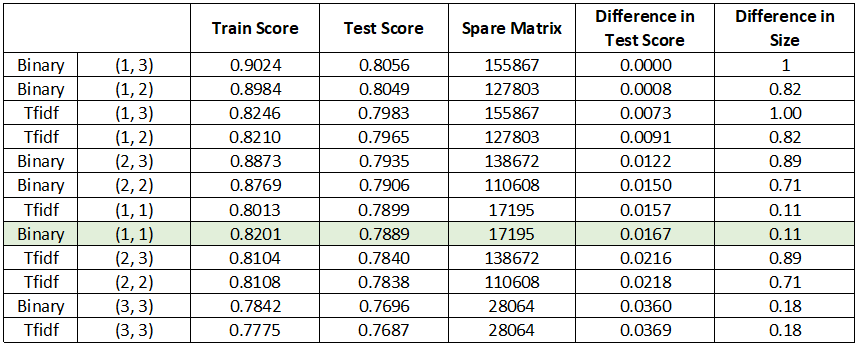

After analyzing the experiment results, we observed that the `(1, 3)` n-gram range with `binary` representation achieved the highest test score, indicating the best performance. This performance can be attributed to its ability to capture a broader range of contextual information compared to smaller n-gram ranges like unigrams or bigrams.  However, this approach resulted in a significantly larger sparse matrix size of `155867`.

Considering the efficiency of model training in subsequent stages, we opted for the `unigram` feature. Despite exhibiting a slightly lower test score compared to the best-performing n-gram approach, with a difference of `0.0157`, its sparse matrix size is notably smaller, comprising only `11%` of the size of the best-performing n-gram approach.

Opting for `binary representation` may lead to faster training compared to `TF-IDF representation`, as it encodes only the presence or absence of a word in a document, resulting in simpler and sparser feature vectors.

### Unigram - Trigram Vectoriser

Based on insights gained from previous experiments, we decided to explore the performance of a combination of the best-performing parameters identified in each experiment. Specifically, we tested the performance of `CountVectorizer` with `binary=True` and `ngram_range=(1,3)`.

In [ ]:
vect = CountVectorizer(binary=True, ngram_range=(1,3))
vectorizer("Binary with n-gram (1, 3)", vect)

Binary with n-gram (1, 3)
(278147, 4730690)
Train Score:  0.9650328782981661
Test Score:  0.8316148237628889


The experiment demonstrated an improvement of `0.03` in performance. However, the model training process took `7` times longer due to the extreme size of the sparse matrix, totaling `4730690` elements.

## Word Embeddings

We undertake the pretraining of the two word embedding models using our preprocessed review dataset. Initially, we tokenise the reviews contained within the dataset, followed by the generation of word embeddings using each respective method. Our aim is to utilise these embeddings as the embedding layer for subsequent training of the `Text as a Sequence` models.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/F20AA_CW2/preprocessed_train.csv')
train.fillna("", inplace=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import gensim
import spacy
from gensim.models import KeyedVectors
from gensim.test.utils import datapath
from tqdm import tqdm
tqdm.pandas(desc="Progress")
nlp_en =spacy.load('en_core_web_sm')

def get_tokens(sentence):
    return [x.text for x in nlp_en(sentence)]

train["tokens"] = train["Preprocessed_Review"].astype('str').progress_apply(get_tokens)
train.to_pickle("train_tokenized.pickle")

Progress: 100%|██████████| 370863/370863 [1:37:19<00:00, 63.51it/s]


FileNotFoundError: [Errno 2] No such file or directory: 'pd_data_tokenized.pickle'

In [ ]:
train = pd.read_pickle("train_tokenized.pickle")

In [ ]:
model_w2v = gensim.models.Word2Vec(train["tokens"].tolist(), min_count=5, window=9, vector_size=300)
model_w2v.save("model_w2v.model")

In [ ]:
model_ft = gensim.models.FastText(train["tokens"].tolist(), min_count=5, window=9, vector_size=300)
model_ft.save("model_ft.model")

In [ ]:
import gensim
model_w2v = gensim.models.Word2Vec.load("model_w2v.model")
model_ft = gensim.models.FastText.load("model_ft.model")

### Word2Vec

In [ ]:
model_w2v.wv.most_similar('craft', topn=5)

[('crafting', 0.5951712727546692),
 ('thrift', 0.5693974494934082),
 ('crafts', 0.5218104124069214),
 ('hobby', 0.49729081988334656),
 ('sewingcraft', 0.4796890318393707)]

In [ ]:
model_w2v.wv.most_similar(positive=['art'], topn=5)

[('bible', 0.5944196581840515),
 ('artist', 0.546704113483429),
 ('illustration', 0.5192423462867737),
 ('classroom', 0.5102368593215942),
 ('artists', 0.5081669092178345)]

### FastText

In [ ]:
model_ft.wv.most_similar('craft', topn=5)

[('ecraft', 0.9662840366363525),
 ('yazycraft', 0.9393974542617798),
 ('cubecraft', 0.9114027619361877),
 ('artcraft', 0.8959652781486511),
 ('hobbycraft', 0.8898105621337891)]

In [ ]:
model_ft.wv.most_similar(positive=['art'], topn=5)

[('arteza', 0.8816118836402893),
 ('artex', 0.8609451055526733),
 ('artograph', 0.8447415828704834),
 ('artarama', 0.8443313241004944),
 ('artsy', 0.8404866456985474)]

## Decision

**Feature Representation**

Based on our previous experiments with various vectorisers, we have settled on using `CountVectorizer(binary=True, stop_words="english", min_df=5, ngram_range=(1,1))` as our primary vectoriser for subsequent `Bag-of-Word (BoW)` models hyperparameter tuning. This choice is motivated by its smallest sparse matrix size, which promises faster training times.

However, in cases where we aim to explore models that performed well during hyperparameter tuning and potentially push for maximum performance, we may consider employing `CountVectorizer(binary=True, ngram_range=(1,3))`. Despite its more complex data dimensionality, this vectoriser could help us test the limits of model performance.

**Word Embeddings**

We will incorporate both pretrained embeddings, `Word2Vec` and `GloVe`, with our dataset as the embedding layer for subsequent training of the `Text as a Sequence` models. This approach allows us to investigate the impact of different word embeddings on model performance.



# Model Training, Selection and Hyperparameter Tuning and Evaluation

In this section, we explore various bag-of-words models, including `Logistic Regression`, `RandomForest`, `XGBoost` and `LightGBM`, using our fixed vectoriser, `CountVectorizer(binary=True, stop_words="english", min_df=5, ngram_range=(1,1))`. This choice was informed by our previous experiments with various vectorisers, where we found that this configuration yielded a compact sparse matrix size, promising faster training times.

However, in cases where we aim to explore models that performed well during hyperparameter tuning and potentially push for maximum performance, we may consider employing `CountVectorizer(binary=True, ngram_range=(1,3))`.

We conduct hyperparameter tuning on each model using our preprocesed text data to optimise their performance and employ `CrossValidation` with `cv=5` to obtain `accuracy` scores. Our objective is to identify the best-performing bag-of-words model among the options considered.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/F20AA_CW2/preprocessed_train.csv')
train.fillna("", inplace=True)

X = train['Preprocessed_Review']
y = train['overall']

Mounted at /content/drive


## Logistic Regression

For our initial model, we opted for `Logistic Regression` as the classifier. To optimise its performance, we employed GridSearchCV. Our parameter grid consisted of various combinations, including different values for regularisation strength `('C')` and solver algorithms `('solver')`. By systematically exploring these combinations, we aimed to identify the optimal set of parameters that would maximise the model's performance.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('vectorizer', CountVectorizer(binary=True, stop_words="english", min_df=5, ngram_range=(1,1))),
    ('classifier', LogisticRegression(max_iter=10000))
])

param_grid = {
    'classifier__C': [0.01, 0.1, 0.5, 1],
    'classifier__solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', verbose=3)
grid_search.fit(X, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("="*60)
print("Best hyperparameters:", best_params)
print("Best cross-validation score:", best_score)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END classifier__C=0.01, classifier__solver=liblinear;, score=0.780 total time=  32.3s
[CV 2/5] END classifier__C=0.01, classifier__solver=liblinear;, score=0.780 total time=  30.2s
[CV 3/5] END classifier__C=0.01, classifier__solver=liblinear;, score=0.779 total time=  31.0s
[CV 4/5] END classifier__C=0.01, classifier__solver=liblinear;, score=0.780 total time=  28.4s
[CV 5/5] END classifier__C=0.01, classifier__solver=liblinear;, score=0.779 total time=  29.6s
[CV 1/5] END classifier__C=0.01, classifier__solver=lbfgs;, score=0.783 total time=  28.5s
[CV 2/5] END classifier__C=0.01, classifier__solver=lbfgs;, score=0.783 total time=  28.4s
[CV 3/5] END classifier__C=0.01, classifier__solver=lbfgs;, score=0.782 total time=  28.5s
[CV 4/5] END classifier__C=0.01, classifier__solver=lbfgs;, score=0.783 total time=  29.5s
[CV 5/5] END classifier__C=0.01, classifier__solver=lbfgs;, score=0.782 total time=  28.5s
[CV 1/5] E

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('vectorizer', CountVectorizer(binary=True, stop_words="english", min_df=5, ngram_range=(1,1))),
    ('classifier', LogisticRegression(max_iter=10000))
])

param_grid = {
    'classifier__C': [1.5, 2],
    'classifier__solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', verbose=3)
grid_search.fit(X, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("="*60)
print("Best hyperparameters:", best_params)
print("Best cross-validation score:", best_score)

### Unigram - Trigram Vectoriser

For the Logistic Regression model, we attempted to perform a GridSearchCV using the unigram - trigram vectoriser as mentioned in the previous section, `CountVectorizer(binary=True, ngram_range=(1,3))`. However, the GridSearchCV process ended early due to the excessively long training time, lasting almost 9 hours.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('vectorizer', CountVectorizer(binary=True, ngram_range=(1,3))),
    ('classifier', LogisticRegression(max_iter=10000))
])

param_grid = {
    'classifier__C': [0.01, 0.1],
    'classifier__solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', verbose=3)
grid_search.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END classifier__C=0.01, classifier__solver=liblinear;, score=0.803 total time= 7.1min
[CV 2/5] END classifier__C=0.01, classifier__solver=liblinear;, score=0.803 total time= 7.7min
[CV 3/5] END classifier__C=0.01, classifier__solver=liblinear;, score=0.804 total time= 7.6min
[CV 4/5] END classifier__C=0.01, classifier__solver=liblinear;, score=0.805 total time= 6.8min
[CV 5/5] END classifier__C=0.01, classifier__solver=liblinear;, score=0.804 total time= 7.4min
[CV 1/5] END classifier__C=0.01, classifier__solver=lbfgs;, score=0.809 total time=22.5min
[CV 2/5] END classifier__C=0.01, classifier__solver=lbfgs;, score=0.809 total time=21.8min
[CV 3/5] END classifier__C=0.01, classifier__solver=lbfgs;, score=0.812 total time=20.5min
[CV 4/5] END classifier__C=0.01, classifier__solver=lbfgs;, score=0.811 total time=22.8min
[CV 5/5] END classifier__C=0.01, classifier__solver=lbfgs;, score=0.810 total time=22.7min
[CV 1/5] E

We conducted cross-validation using the unigram - trigram vectoriser along with the optimised hyperparameters obtained from the previous experiments.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True, ngram_range=(1,3))
X_train_CV = vectorizer.fit_transform(X)

lr_classifier = LogisticRegression(max_iter=10000, C=1, solver='liblinear')
cv_scores = cross_val_score(lr_classifier, X_train_CV, y, cv=5, scoring='accuracy', verbose=3)
print("Cross-Validation Scores for LogisticRegression:", cv_scores)

[CV] END ................................ score: (test=0.833) total time=43.4min


## RandomForestClassifier

For our second model, `RandomForestClassifier`, we utilised GridSearchCV to enhance its performance. Our parameter grid encompassed a range of combinations, including varying values for `n_estimators` and `max_leaf_nodes`. Through this systematic exploration, our goal was to pinpoint the optimal parameter set that would maximize the model's performance.

https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('vectorizer', CountVectorizer(binary=True, stop_words="english", min_df=5, ngram_range=(1,1))),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [200, 300, 400],
    'classifier__max_leaf_nodes': [20, 30]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', verbose=3)
grid_search.fit(X, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("="*60)
print("Best hyperparameters:", best_params)
print("Best cross-validation score:", best_score)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END classifier__max_leaf_nodes=20, classifier__n_estimators=200;, score=0.764 total time=  38.1s
[CV 2/5] END classifier__max_leaf_nodes=20, classifier__n_estimators=200;, score=0.764 total time=  31.2s
[CV 3/5] END classifier__max_leaf_nodes=20, classifier__n_estimators=200;, score=0.764 total time=  39.1s
[CV 4/5] END classifier__max_leaf_nodes=20, classifier__n_estimators=200;, score=0.764 total time=  32.6s
[CV 5/5] END classifier__max_leaf_nodes=20, classifier__n_estimators=200;, score=0.764 total time=  31.1s
[CV 1/5] END classifier__max_leaf_nodes=20, classifier__n_estimators=300;, score=0.764 total time=  41.3s
[CV 2/5] END classifier__max_leaf_nodes=20, classifier__n_estimators=300;, score=0.764 total time=  44.4s
[CV 3/5] END classifier__max_leaf_nodes=20, classifier__n_estimators=300;, score=0.764 total time=  42.6s
[CV 4/5] END classifier__max_leaf_nodes=20, classifier__n_estimators=300;, score=0.764 total

### Unigram - Trigram Vectoriser

We conducted cross-validation using the unigram - trigram vectoriser along with the optimised hyperparameters obtained from the previous experiments. The aim was to assess whether the model could achieve improved performance when faced with a more complex dataset.

In [ ]:
from sklearn.model_selection import cross_val_score

vectorizer = CountVectorizer(binary=True, ngram_range=(1,3))
X_train_CV = vectorizer.fit_transform(X)

rdf_model = RandomForestClassifier(random_state=42, max_leaf_nodes=20, n_estimators=200)
cv_scores = cross_val_score(rdf_model, X_train_CV, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores for RandomForest:", cv_scores)

Cross-Validation Scores for RandomForest: [0.76352581 0.76352581 0.76352581 0.76353611 0.76353611]


## XGBoost

Our third model, `XGBoost`, underwent optimisation for performance using GridSearchCV. We constructed a parameter grid with diverse combinations, incorporating various values for `learning_rate` and `max_depth`. Through systematic exploration of these combinations, our goal was to pinpoint the optimal parameter set that would maximize the model's performance.

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [5, 7, 10],
}

xgb_classifier = XGBClassifier(random_state=42)
vectorizer = CountVectorizer(binary=True, stop_words="english", min_df=5, ngram_range=(1,1))

X_train_CV = vectorizer.fit_transform(X)
# XGB expects ratings from 0 - 4, hence need to encode
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy', verbose=3)
grid_search.fit(X_train_CV, y_encoded)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("="*60)
print("Best hyperparameters:", best_params)
print("Best cross-validation score:", best_score)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ...learning_rate=0.01, max_depth=5;, score=0.768 total time=  53.5s
[CV 2/5] END ...learning_rate=0.01, max_depth=5;, score=0.769 total time=  55.0s
[CV 3/5] END ...learning_rate=0.01, max_depth=5;, score=0.769 total time=  52.5s
[CV 4/5] END ...learning_rate=0.01, max_depth=5;, score=0.769 total time=  51.8s
[CV 5/5] END ...learning_rate=0.01, max_depth=5;, score=0.769 total time=  54.7s
[CV 1/5] END ...learning_rate=0.01, max_depth=7;, score=0.771 total time= 1.7min
[CV 2/5] END ...learning_rate=0.01, max_depth=7;, score=0.772 total time= 1.8min
[CV 3/5] END ...learning_rate=0.01, max_depth=7;, score=0.770 total time= 1.8min
[CV 4/5] END ...learning_rate=0.01, max_depth=7;, score=0.771 total time= 1.9min
[CV 5/5] END ...learning_rate=0.01, max_depth=7;, score=0.771 total time= 1.8min
[CV 1/5] END ..learning_rate=0.01, max_depth=10;, score=0.774 total time= 4.3min
[CV 2/5] END ..learning_rate=0.01, max_depth=10;,

### Unigram - Trigram Vectoriser

We proceeded with cross-validation using the `unigram-trigram vectorizer` alongside the optimised hyperparameters obtained from prior experiments. The objective was to evaluate whether the model could demonstrate enhanced performance when confronted with a more intricate dataset.

Unfortunately, our session crashed during the `cross-validation` process with the unigram-trigram vectorizer due to insufficient RAM. Consequently, we opted to directly train the model on `Jupyter Notebook` for submission to `Kaggle`, by fitting the data chunk by chunk to the XGBoost classifier.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier

vectorizer = CountVectorizer(binary=True, ngram_range=(1,3))
X_train_CV = vectorizer.fit_transform(X)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

xgb_classifier = XGBClassifier(random_state=42, learning_rate=1, max_depth=10)
cv_scores = cross_val_score(xgb_classifier, X_train_CV, y_encoded, cv=5, scoring='accuracy', verbose=3)
print("Cross-Validation Scores for XGBoost:", cv_scores)

Session Crashed.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier

train = pd.read_csv('preprocessed_train.csv')
train.fillna("", inplace=True)

X = train['Preprocessed_Review']
y = train['overall']

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier

vectorizer = CountVectorizer(binary=True, ngram_range=(1,3))
X_train_CV = vectorizer.fit_transform(X)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [ ]:
import xgboost as xgb

chunk_size = 700
num_samples = X_train_CV.shape[0]

xgb_classifier = xgb.Booster()

In [ ]:
for i in range(0, num_samples, chunk_size):
    X_chunk = X_train_CV[i:i+chunk_size]
    y_chunk = y_encoded[i:i+chunk_size]
    xg_test = xgb.DMatrix(X_chunk, y_chunk)
    xgb_classifier = xgb.train({'learning_rate': 1, 'max_depth': 10, 'verbosity': 2}, xg_test)
    print(xgb_classifier)

xgb_classifier.save_model('xgboost_tri.model')

D:\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [10:08:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


## LightGBM

We optimised the performance of our fourth model, `LightGBM`, using GridSearchCV. This involved constructing a parameter grid with diverse combinations, including different values for `num_leaves`, `learning_rate`, and `n_estimators`. By systematically exploring these combinations, our objective was to identify the optimal parameter set that would maximize the model's performance.

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

param_grid = {
    'num_leaves': [5, 20],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [50, 100, 150]
}

lgbm_classifier = LGBMClassifier(random_state=42, verbose=0)
vectorizer = CountVectorizer(binary=True, stop_words="english", min_df=5, ngram_range=(1,1))

X_train_CV = vectorizer.fit_transform(X)
# LGBM expects float inputs
X_train_CV_float = X_train_CV.astype(np.float64)
y_float = y.astype(np.float64)

grid_search = GridSearchCV(lgbm_classifier, param_grid, cv=5, scoring='accuracy', verbose=3)
grid_search.fit(X_train_CV_float, y_float)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("="*60)
print("Best hyperparameters:", best_params)
print("Best cross-validation score:", best_score)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END learning_rate=0.05, n_estimators=50, num_leaves=5;, score=0.767 total time= 1.6min
[CV 2/5] END learning_rate=0.05, n_estimators=50, num_leaves=5;, score=0.767 total time= 1.5min
[CV 3/5] END learning_rate=0.05, n_estimators=50, num_leaves=5;, score=0.767 total time= 1.5min
[CV 4/5] END learning_rate=0.05, n_estimators=50, num_leaves=5;, score=0.767 total time= 1.5min
[CV 5/5] END learning_rate=0.05, n_estimators=50, num_leaves=5;, score=0.767 total time= 1.5min
[CV 1/5] END learning_rate=0.05, n_estimators=50, num_leaves=20;, score=0.777 total time= 1.6min
[CV 2/5] END learning_rate=0.05, n_estimators=50, num_leaves=20;, score=0.777 total time= 1.7min
[CV 3/5] END learning_rate=0.05, n_estimators=50, num_leaves=20;, score=0.776 total time= 1.6min
[CV 4/5] END learning_rate=0.05, n_estimators=50, num_leaves=20;, score=0.776 total time= 1.6min
[CV 5/5] END learning_rate=0.05, n_estimators=50, num_leaves=20;, score

### Unigram - Trigram Vectoriser

We proceeded with cross-validation using the `unigram-trigram vectorizer` alongside the optimised hyperparameters obtained from prior experiments. The objective was to evaluate whether the model could demonstrate enhanced performance when confronted with a more intricate dataset.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from lightgbm import LGBMClassifier
import numpy as np

vectorizer = CountVectorizer(binary=True, ngram_range=(1,3))
X_train_CV = vectorizer.fit_transform(X)
# LGBM expects float inputs
X_train_CV_float = X_train_CV.astype(np.float64)
y_float = y.astype(np.float64)

lgbm_classifier = LGBMClassifier(random_state=42, verbose=0, learning_rate=0.1, n_estimators=150, num_leaves=20)
cv_scores = cross_val_score(lgbm_classifier, X_train_CV_float, y_float, cv=5, scoring='accuracy', verbose=3)
print("Cross-Validation Scores for XGBoost:", cv_scores)

[CV] END ................................ score: (test=0.803) total time=28.3min


## Summary

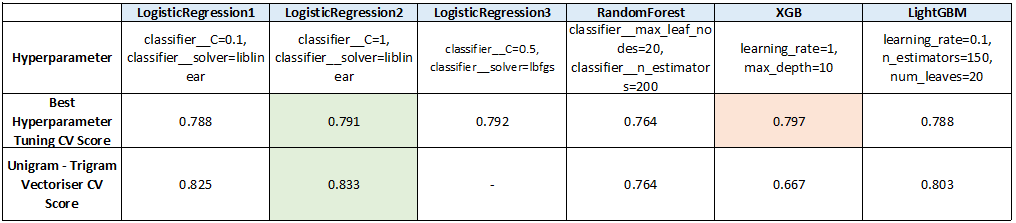

**Logistic Regression**

`LogisticRegression(C=0.1, solver='lbfgs', max_iter=10000)`

* This model demonstrated the best performance during the hyperparameter tuning. However, the training process for this model took approximately 45 minutes, which is considerably long.

`LogisticRegression(C=0.1, solver='liblinear', max_iter=10000)`

* As an alternative, we found that this model offers comparable performance with accuracy `0.825`, with only a slight difference of `0.004` in accuracy. Importantly, the training time for this model is three times shorter than the previous one.

* We attempted a Kaggle submission with this model, and achieved a public score of `0.83172`.

`LogisticRegression(C=1, solver='liblinear', max_iter=10000)`

* We conducted cross-validation using the unigram - trigram vectoriser with the optimised hyperparameters obtained from the previous experiments, resulted with accuracy `0.833`.

* We attempted a Kaggle submission with this model, and achieved a public score of `0.84091`.


**RandomForest**

`RandomForestClassifier(random_state=42, max_leaf_nodes=20, n_estimators=200)`

* Upon evaluation, all candidates derived from the GridSearchCV, and also when paired with the best-performing vectorizer, yielded a cross-validation score of `0.764`. This consistency across different parameter combinations suggests that the `RandomForest` algorithm may have reached its limit in terms of performance for this dataset or prediction task.

* The resulting accuracy of `0.764` was not higher than that of other models. Therefore, we have decided not to attempt a Kaggle submission with this model.

**XGBoost**

`XGBClassifier(random_state=42, learning_rate=1, max_depth=10)`

* Unfortunately, our session crashed during the `cross-validation` process with the unigram-trigram vectorizer due to insufficient RAM.
* Consequently, we opted to directly train the model on `Jupyter` for submission to `Kaggle`, by fitting the data chunk by chunk to the XGBoost classifier.
* We attempted a Kaggle submission with this model, and achieved a public score of `0.66734`.
* The low performance of this model could stem from challenges in training and prediction handling. To facilitate incremental learning for the XGBoost model, we opted to use the `Python package API` instead of Scikit-learn.
* However, the Python package API might not provide the same level of direct usability as Scikit-learn. This difference in usability could have led to inefficiencies or suboptimal configurations in the training and prediction processes, ultimately impacting the model's performance.


**LightGBM**

`LGBMClassifier(random_state=42, verbose=0, learning_rate=0.1, n_estimators=150, num_leaves=20)`

* We conducted cross-validation using the unigram-trigram vectorizer along with the optimised hyperparameters obtained from previous experiments.
* However, the resulting accuracy of `0.803` was not higher than that of other models. Therefore, we have decided not to attempt a Kaggle submission with this model.

Overall, the `Logistic Regression models` outperform the other three models, as indicated by their higher CV scores. We attribute this performance to the computational efficiency of Logistic Regression, especially when compared to more complex models like `Random Forests` or `Gradient Boosting Machines`. Logistic Regression can effectively handle large datasets with fewer computational resources, which makes it well-suited for training on a vast dataset of text reviews.

# Modelling Text as A Sequence

In this section, we explore different text as a sequence models to analyse their performance and effectiveness in handling textual data. These models include `simple RNN`, `LSTM` (with or without word embeddings), pretrained `DistillBERT`, and `Transformer` with BERT.

## RNN

Our initial model employs a simple `RNN` architecture with a vectorize layer utilising the `TextVectorization` module from `Keras`, followed by an embedding layer and a simpleRNN layer. However, due to the large size of the dataset, the `TextVectorization` process could only adapt approximately `22%` of the text data, constrained by our limited RAM capacity.

In [ ]:
import pandas as pd
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

sequence_length = 100
vectorize_layer = TextVectorization(output_mode='int', output_sequence_length=sequence_length)

file_path = '/content/drive/MyDrive/Colab Notebooks/F20AA_CW2/preprocessed_train.csv'
train = pd.read_csv(file_path, nrows=80000)

embedding_dim = 300

vectorize_layer.adapt(train['Preprocessed_Review'].tolist())
vocab_size = vectorize_layer.vocabulary_size()

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Activation, Dense, Embedding, LSTM, Dropout, SimpleRNN
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

model = Sequential()
model.add(vectorize_layer)
model.add(Embedding(vocab_size, embedding_dim, name="embedding"))
model.add(SimpleRNN(units=128))
model.add(Dense(units=5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding, TextVectorization
from tensorflow.keras.utils import to_categorical

file_path = '/content/drive/MyDrive/Colab Notebooks/F20AA_CW2/preprocessed_train.csv'
chunk_size = 20000
data_chunks = pd.read_csv(file_path, chunksize=chunk_size)

for chunk in data_chunks:
  chunk.fillna("", inplace=True)
  X_raw = chunk['Preprocessed_Review'].to_frame()
  y_raw = chunk['overall'].to_frame()
  y_raw = np.array(y_raw, dtype='float32')
  y_raw = np.squeeze(y_raw)
  y_raw -= 1
  X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42, stratify=y_raw)
  model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=256)

model.save('rnn_basic')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/3
63/63 [==============================] - 39s 629ms/step - loss: 0.8310 - accuracy: 0.7644 - val_loss: 0.8182 - val_accuracy: 0.7655
Epoch 2/3
63/63 [==============================] - 42s 677ms/step - loss: 0.7963 - accuracy: 0.7717 - val_loss: 0.8248 - val_accuracy: 0.7638
Epoch 3/3
63/63 [==============================] - 39s 623ms/step - loss: 0.7547 - accuracy: 0.7914 - val_loss: 0.8361 - val_accuracy: 0.7598
Epoch 1/3
63/63 [==============================] - 40s 641ms/step - loss: 0.8411 - accuracy: 0.7565 - val_loss: 0.8361 - val_accuracy: 0.7575
Epoch 2/3
63/63 [==============================] - 41s 650ms/step - loss: 0.8045 - accuracy: 0.7694 - val_loss: 0.8432 - val_accuracy: 0.7550
Epoch 3/3
63/63 [==============================] - 46s 741ms/step - loss: 0.7771 - accuracy: 0.7793 - val_loss: 0.8574 - val_accuracy: 0.7487
Epoch 1/3
63/63 [==

### with Gensim GloVe

Expanding on the previous architecture utilising a simple RNN, we integrate pre-trained word embeddings from `GloVe` by `Gensim` into our embedding layer.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/F20AA_CW2/preprocessed_train.csv')
train.fillna("", inplace=True)

X = train['Preprocessed_Review']
y = train['overall']

# Split the data into training and testing sets, ensuring stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10, stratify=y)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
y_train = np.array(y_train, dtype='float32')
y_train = np.squeeze(y_train)
y_train -= 1
y_test = np.array(y_test, dtype='float32')
y_test = np.squeeze(y_test)
y_test -= 1

In [ ]:
!pip install -U nltk

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import FastText
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

X_train = X_train.apply(preprocess)
X_test = X_test.apply(preprocess)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index) + 1

max_length = 100
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

In [ ]:
import gensim.downloader
glove_gensim = gensim.downloader.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    if word in glove_gensim:
        embedding_matrix[i] = glove_gensim[word]

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length, trainable=False))
model.add(SimpleRNN(units=128))
model.add(Dense(units=5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=256)
model.save('rnn_glove')

Epoch 1/5
1087/1087 [==============================] - 256s 234ms/step - loss: 0.8377 - accuracy: 0.7609 - val_loss: 0.8325 - val_accuracy: 0.7619
Epoch 2/5
1087/1087 [==============================] - 248s 228ms/step - loss: 0.8293 - accuracy: 0.7626 - val_loss: 0.8337 - val_accuracy: 0.7609
Epoch 3/5
1087/1087 [==============================] - 249s 229ms/step - loss: 0.8368 - accuracy: 0.7583 - val_loss: 0.8244 - val_accuracy: 0.7634
Epoch 4/5
1087/1087 [==============================] - 239s 220ms/step - loss: 0.8288 - accuracy: 0.7595 - val_loss: 0.8302 - val_accuracy: 0.7634
Epoch 5/5
1087/1087 [==============================] - 250s 230ms/step - loss: 0.8191 - accuracy: 0.7637 - val_loss: 0.8185 - val_accuracy: 0.7635


## LSTM

https://www.analyticsvidhya.com/blog/2021/06/lstm-for-text-classification/

Our second model incorporates `Long Short-Term Memory (LSTM)` layers alongside a vectorisation layer, embedding layer, and dropout. Similar to the previous model, the dataset's size poses a challenge for complete adaptation by the `TextVectorization` due to our limited RAM capacity. Consequently, only `22%` of the text data can be accommodated within our memory constraints.

In [ ]:
import pandas as pd
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

sequence_length = 100
vectorize_layer = TextVectorization(output_mode='int', output_sequence_length=sequence_length)

file_path = '/content/drive/MyDrive/Colab Notebooks/F20AA_CW2/preprocessed_train.csv'
train = pd.read_csv(file_path, nrows=80000)

embedding_dim = 300

vectorize_layer.adapt(train['Preprocessed_Review'].tolist())
vocab_size = vectorize_layer.vocabulary_size()

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Activation, Dense, Embedding, LSTM, Dropout


model = Sequential()
model.add(vectorize_layer)
model.add(Embedding(vocab_size, embedding_dim, name="embedding"))
model.add(LSTM(128, input_shape=(sequence_length, embedding_dim), activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding, TextVectorization
from tensorflow.keras.utils import to_categorical

file_path = '/content/drive/MyDrive/Colab Notebooks/F20AA_CW2/preprocessed_train.csv'
chunk_size = 20000
data_chunks = pd.read_csv(file_path, chunksize=chunk_size)

for chunk in data_chunks:
  chunk.fillna("", inplace=True)
  X_raw = chunk['Preprocessed_Review'].to_frame()
  y_raw = chunk['overall'].to_frame()
  y_raw = np.array(y_raw, dtype='float32')
  y_raw = np.squeeze(y_raw)
  y_raw -= 1
  X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42, stratify=y_raw)
  model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=256)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/3
63/63 [==============================] - 125s 2s/step - loss: 593672000.0000 - accuracy: 0.5471 - val_loss: 23615998.0000 - val_accuracy: 0.6417
Epoch 2/3
63/63 [==============================] - 129s 2s/step - loss: 68266792.0000 - accuracy: 0.4487 - val_loss: 28419160.0000 - val_accuracy: 0.7412
Epoch 3/3
63/63 [==============================] - 127s 2s/step - loss: 54233416.0000 - accuracy: 0.4869 - val_loss: 30842712.0000 - val_accuracy: 0.7517
Epoch 1/3
63/63 [==============================] - 126s 2s/step - loss: 75238504.0000 - accuracy: 0.5113 - val_loss: 52447432.0000 - val_accuracy: 0.7395
Epoch 2/3
63/63 [==============================] - 125s 2s/step - loss: 85823512.0000 - accuracy: 0.5537 - val_loss: 40059412.0000 - val_accuracy: 0.7437
Epoch 3/3
63/63 [==============================] - 124s 2s/step - loss: 27262502.0000 - accuracy: 0.

In [ ]:
model.save('lstm_basic')

### with Word2Vec

https://spotintelligence.com/2023/02/15/word2vec-for-text-classification/

Expanding upon the `LSTM` architecture discussed earlier, we integrate our pretrained `Word2Vec` word embeddings into the embedding layer of the model.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/F20AA_CW2/preprocessed_train.csv')
train.fillna("", inplace=True)

X = train['Preprocessed_Review']
y = train['overall']

# Split the data into training and testing sets, ensuring stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10, stratify=y)

Mounted at /content/drive


In [ ]:
y_train = np.array(y_train, dtype='float32')
y_train = np.squeeze(y_train)
y_train -= 1
y_test = np.array(y_test, dtype='float32')
y_test = np.squeeze(y_test)
y_test -= 1

In [ ]:
!pip install -U nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.5 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

X_train = X_train.apply(preprocess)
X_test = X_test.apply(preprocess)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index) + 1

max_length = 100
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

In [ ]:
w2v_model = Word2Vec.load('model_w2v.model')

embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length, trainable=False))
model.add(LSTM(128, input_shape=(max_length, 300), activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=256)
model.save('lstm_word2vec')

Epoch 1/5
1087/1087 [==============================] - 1885s 2s/step - loss: 1073110.0000 - accuracy: 0.7597 - val_loss: 0.8474 - val_accuracy: 0.7635
Epoch 2/5
1087/1087 [==============================] - 2107s 2s/step - loss: 105445.5156 - accuracy: 0.7631 - val_loss: 0.8208 - val_accuracy: 0.7635
Epoch 3/5
1087/1087 [==============================] - 1850s 2s/step - loss: 18071.1406 - accuracy: 0.7634 - val_loss: 0.8171 - val_accuracy: 0.7635
Epoch 4/5
1087/1087 [==============================] - 1743s 2s/step - loss: 18333.3809 - accuracy: 0.7634 - val_loss: 0.8169 - val_accuracy: 0.7635
Epoch 5/5
1087/1087 [==============================] - 1800s 2s/step - loss: 9754.6367 - accuracy: 0.7635 - val_loss: 0.8170 - val_accuracy: 0.7635


### with FastText

Additionally, we conducted experiments by incorporating our pretrained `FastText` word embeddings into the `LSTM` architecture.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/F20AA_CW2/preprocessed_train.csv')
train.fillna("", inplace=True)

X = train['Preprocessed_Review']
y = train['overall']

# Split the data into training and testing sets, ensuring stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10, stratify=y)

Mounted at /content/drive


In [ ]:
y_train = np.array(y_train, dtype='float32')
y_train = np.squeeze(y_train)
y_train -= 1
y_test = np.array(y_test, dtype='float32')
y_test = np.squeeze(y_test)
y_test -= 1

In [ ]:
!pip install -U nltk

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import FastText
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

X_train = X_train.apply(preprocess)
X_test = X_test.apply(preprocess)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index) + 1

max_length = 100
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

In [ ]:
ft_model = FastText.load('/content/drive/MyDrive/Colab Notebooks/F20AA_CW2/model_ft.model')

embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    if word in ft_model.wv:
        embedding_matrix[i] = ft_model.wv[word]

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length, trainable=False))
model.add(LSTM(128, input_shape=(max_length, 300), activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=256)
model.save('lstm_fasttext')

Epoch 1/5
1087/1087 [==============================] - 1489s 1s/step - loss: 390198.3750 - accuracy: 0.7446 - val_loss: 261.1375 - val_accuracy: 0.7566
Epoch 2/5
1087/1087 [==============================] - 1449s 1s/step - loss: 332.1959 - accuracy: 0.7476 - val_loss: 143.3035 - val_accuracy: 0.7500
Epoch 3/5
1087/1087 [==============================] - 1447s 1s/step - loss: 201.0875 - accuracy: 0.7459 - val_loss: 53.4043 - val_accuracy: 0.7481
Epoch 4/5
1087/1087 [==============================] - 1443s 1s/step - loss: 111.0508 - accuracy: 0.7468 - val_loss: 16.1611 - val_accuracy: 0.7563
Epoch 5/5
1087/1087 [==============================] - 1450s 1s/step - loss: 60.6827 - accuracy: 0.7514 - val_loss: 7.0764 - val_accuracy: 0.7592


## DistilBERT

https://medium.com/@hkstrife2001/text-classification-using-hugging-face-de6a978f037

We explored the implementation of the `DistilBERT` model from Hugging Face. This model offers a compact and faster version of BERT. Our objective was to fine-tune the DistilBERT model using transfer learning on the Amazon review dataset. The architecture of the model comprises an input layer, multiple transformer blocks, and a dense output layer with softmax activation for multi-class classification.

Despite our efforts, the training process encountered challenges. After `18 hours` of training, encompassing the first and only epoch, our session abruptly crashed due to insufficient RAM. This setback prevented the completion of the training process, leaving our exploration of the DistilBERT model incomplete.

In [ ]:
from transformers import TFDistilBertForSequenceClassification
from transformers import DistilBertTokenizerFast

num_labels = 5
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=num_labels)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [ ]:
from tensorflow.keras import optimizers, losses, metrics

model.compile(
    optimizer='adam',
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=metrics.SparseCategoricalAccuracy()
)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
import tensorflow as tf
import numpy as np

file_path = '/content/drive/MyDrive/Colab Notebooks/F20AA_CW2/preprocessed_train.csv'
chunk_size = 10000
data_chunks = pd.read_csv(file_path, chunksize=chunk_size)

for chunk in data_chunks:
  chunk.fillna("", inplace=True)
  train_encodings = tokenizer(chunk['Preprocessed_Review'].tolist(), truncation=True, padding=True)
  y_raw = chunk['overall'].to_frame()
  y_raw = np.array(y_raw, dtype='float32')
  y_raw = np.squeeze(y_raw)
  y_raw -= 1
  dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_raw))
  dataset = dataset.shuffle(len(chunk))
  train_size = int(0.75 * len(chunk))
  train_dataset = dataset.take(train_size)
  test_dataset = dataset.skip(train_size)
  train_dataset = train_dataset.batch(16)
  test_dataset = test_dataset.batch(16)
  model.fit(train_dataset, epochs=1, verbose=2, validation_data=test_dataset)

model.save('distilbert')

Mounted at /content/drive


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
469/469 - 28136s - loss: 0.8483 - sparse_categorical_accuracy: 0.7628 - val_loss: 0.8292 - val_sparse_categorical_accuracy: 0.7680 - 28136s/epoch - 60s/step


## Transformer with BERT

https://www.analyticsvidhya.com/blog/2021/12/multiclass-classification-using-transformers/

We attempted to experiment with a `Transformer` model utilising BERT embeddings. However, the large size of our training dataset needed to be fitted into the BERT model, causing our session to crash due to fully utilised RAM resources. Consequently, we were unable to construct and train a Transformer model for our multiclass text classification task.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/F20AA_CW2/preprocessed_train.csv')
train.fillna("", inplace=True)

X = train['Preprocessed_Review']
y = train['overall']

# Split the data into training and testing sets, ensuring stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10, stratify=y)

Mounted at /content/drive


In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
import transformers
from transformers import AutoTokenizer,TFBertModel
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
x_train = tokenizer(
    text=X_train.tolist(),
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True)

In [ ]:
x_test = tokenizer(
    text=X_test.tolist(),
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True)

In [ ]:
input_ids = x_train['input_ids']
attention_mask = x_train['attention_mask']

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense

max_len = 70
input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
embeddings = bert(x_train)[0]
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32, activation='relu')(out)
y = Dense(5, activation='softmax')(out)
model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

Session Crashed here

## Summary

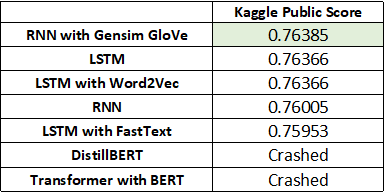

* The `RNN with Gensim GloVe` achieved the highest Kaggle Public Score of `0.76385`, closely followed by the LSTM model with a score of 0.76366.
* The performance of `LSTM` models `with` pretrained word embeddings Word2Vec and FastText is the same as or lower than the performance `without` pretrained word embeddings.
* Both the `DistilBERT` and `Transformer with BERT` models encountered crashes during training, preventing an evaluation of their performance.
* RNN, LSTM, and their variations with different word embeddings, exhibited similar performance.
* The similarity in performance among these neural network architectures may be due to the absence of effective optimisation, as we did not perform hyperparameter tuning for these models as they require extensive computational resources.

# Topic Modelling of High and Low Ratings

In this section, we implement topic modeling on reviews with ratings of 1 and 5, respectively, using Latent Dirichlet Allocation (LDA). We explore two types of visualisations to depict the most prevalent topics among the datasets with high and low ratings.

Firstly, we present 10 topics with 10 terms each for the two rating datasets using the `mglearn` library.

Secondly, we employ `WordCloud` to enhance the visualisation of common terms within each rating dataset.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/F20AA_CW2/train.csv')
train.dropna(subset=['Review'], inplace=True)

In [ ]:
!pip install pyLDAvis pandas==1.5.1 mglearn wordcloud

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import numpy as np
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.lda_model
import mglearn as mglearn

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

def lda_topic_modeling(comments, rating, cloud, topic_num):
  normalizer = TextNormalizer(convert_to_lowercase=False)
  normalised = normalizer.transform(comments)
  vectorizer = TfidfVectorizer(max_df=30,min_df=5, stop_words='english',use_idf=True)
  X = vectorizer.fit_transform(normalised)

  lda = LatentDirichletAllocation(n_components=topic_num, learning_method="batch",
                                max_iter=100, random_state=0)
  lda.fit(X)

  print("Rating: ", rating)
  sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
  feature_names = np.array(vectorizer.get_feature_names_out())
  mglearn.tools.print_topics(topics=range(topic_num), feature_names=feature_names,sorting=sorting, topics_per_chunk=topic_num, n_words=topic_num)

  return lda, vectorizer, X

def get_top_words(lda_model, vectorizer, n_words=5):
  feature_names = vectorizer.get_feature_names_out()
  top_words = []
  weights = []

  for topic_idx, topic in enumerate(lda_model.components_):
    top_word_indices = topic.argsort()[:-n_words - 1:-1]
    top_words.append([feature_names[i] for i in top_word_indices])
    weights.append(topic[top_word_indices])

  return top_words, weights

def plot_word_bubbles(top_words_list, weights_list, titles):
  fig, axs = plt.subplots(1, 2, figsize=(15, 5))

  for ax, top_words, weights, title in zip(axs, top_words_list, weights_list, titles):
    word_freq = {}

    for word_list, weight_array in zip(top_words, weights):
      for word, weight in zip(word_list, weight_array):
          word_freq[word] = weight

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title)
    ax.axis('off')

  plt.tight_layout()
  plt.show()

def lda_pipeline(data, cloud=False, topic_num=15):
  one_review = data[data['overall'] == 1]['Review']
  five_review = data[data['overall'] == 5]['Review']


  lda_one, vectorizer_one, X_one = lda_topic_modeling(one_review, '1', cloud, topic_num)
  lda_five, vectorizer_five, X_five = lda_topic_modeling(five_review, '5', cloud, topic_num)

  vis_one = pyLDAvis.lda_model.prepare(lda_one, X_one, vectorizer_one)
  vis_five = pyLDAvis.lda_model.prepare(lda_five, X_five, vectorizer_five)

  if cloud:
    top_words_one, weights_one = get_top_words(lda_one, vectorizer_one)
    top_words_five, weights_five = get_top_words(lda_five, vectorizer_five)
    plot_word_bubbles([top_words_one, top_words_five],
    [weights_one, weights_five],
                      titles=['One-Star Review','Five-Star Review'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Rating:  ONE
topic 0       topic 1       topic 2       topic 3       topic 4       topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      --------      --------      --------      --------      --------      
beads         sharpener     rusted        scratchy      peg           winding       slow          rhinestone    tied          template      
hammer        chipped       jump          residue       crayon        wool          reorder       ugh           tangled       faded         
nail          bulky         ounce         bleed         loom          impression    pic           tin           hated         palette       
terribly      crimp         lack          play          messed        load          inconsistent  34            stupid        delivered     
powder        beading       skip          tore          comment       crack         janome        cameo         rounded       shine         


/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


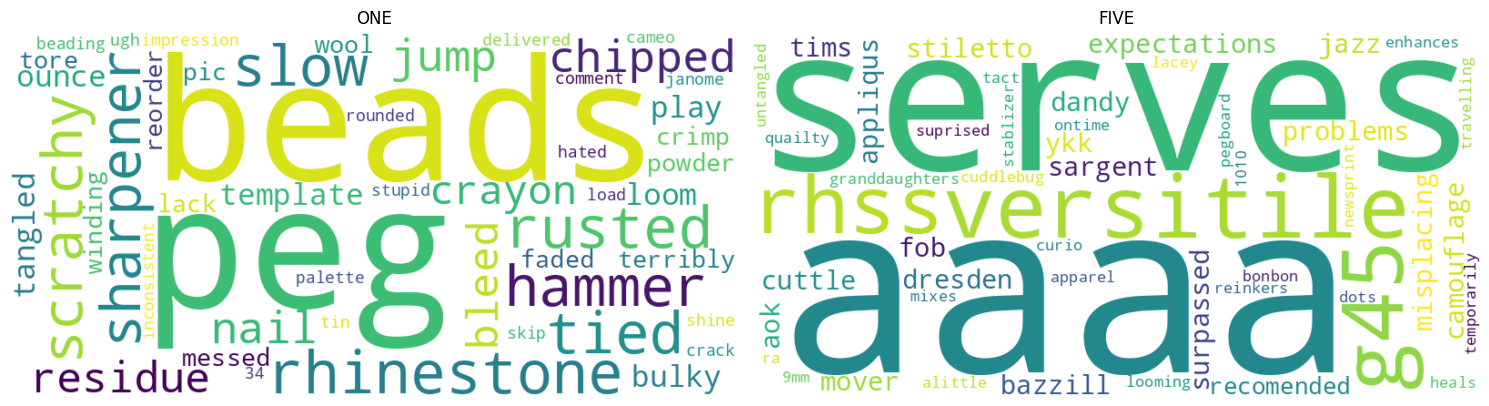

In [ ]:
lda_pipeline(train, True, 10)

## General Observations

*   Product reviews with high ratings mention substantially more brand and model names than low-rated product reviews. The frequency of brand and model name mentions in product reviews may reflect the reviewers' positive experiences and trust in certain brands.

* Positive words like `recommended`, `surprised`, `perfecto`, and `alright` are found in the high-rating dataset. These positive expressions indicate that the reviewers likely had favorable experiences and are inclined to recommend the product to others.

*   Negative words like `terribly`, `rusted`, `lack`, `messed`, `sucks`, `dissatisfied`, `awkward`, and `hated` are found in the low-rating dataset. These negative expressions may highlight problems such as poor quality, malfunction, inadequate features, or overall disappointment with the purchase.








## One-Star Ratings

*   Topic 0 - Home Improvement Tools
  * Customers express a `terrible` experience with tools such as hammers, nails, and blades.
*   Topic 1 - Bulky and Chipped Products
  * Dissatisfaction with the size or weight of products, indicated by terms like `bulky`, and issues with product defects such as chipped sharpener blades or `crimping` tools, indicating poor craftsmanship or quality control.
* Topic 2 - Shortage and Rust Issues
  * Customers report shortages in quantity or quality of products, as indicated by the term `lack`, and rusting issues, suggesting subpar materials or storage conditions.
* Topic 3 & 4 - Painting Supplies Issues
  * Complaints about painting supplies like pegs, crayons, and looms, including issues like scratchy textures, torn canvases, bleeding ink, and blunt pen nibs, indicating poor quality or design flaws.
* Topic 5 - Knitting Supplies Problems
  *  Dissatisfaction with knitting supplies such as wool and thimbles, with mentions of cracking materials, suggesting issues with product durability or usability.
* Topic 6 - Sewing Machine Problems
  * Customers report issues or experiences related to sewing machines, with mentions of the Janome brand, inconsistent stitching, and slow operation, indicating dissatisfaction with product performance or reliability.
* Topic 7 & 8 - Decorative Art Supplies Issues
  *  Complaints about decorative art supplies like cameos, rhinestones, and bands, including issues like tangling hair or entanglement, suggesting poor design or usability.
* Topic 9 - Makeup Art Supplies Problems
  * Dissatisfaction with makeup art supplies such as faded palettes and overly shiny formulations, indicating issues with product quality or performance.

## Five-Star Ratings

* Topic 0 - Art Supplies Reviews
  * Customers review products like reinkers and embroidery supplies, mentioning the Sargent brand, indicating satisfaction or specific experiences with these art supplies.
* Topic 1 - Fashion-related Reviews
  * Reviews likely pertain to fashion-related items, with mentions of `apparel` and `moda`, suggesting discussions about clothing or accessories. Terms like `jazz`, `dandy`, and `puff` may refer to style preferences or features of these items.
* Topic 2 - Yarn Craft and Paper Crafting Reviews
  * `Crop-A-Dile` is used for punching holes in paper, `G45` is a vintage decorative paper supplies brand, and `RHSS` is an acrylic yarn brand.
* Topic 3 - DIY Home Decor Reviews
  * Customers review DIY home decor supplies like Curio, with mentions of products that `beat` others, suggesting superior quality or performance.
* Topic 4 - Heat Transfer Crafting Products Reviews
  * Reviews likely focus on heat transfer crafting products, with mentions of brands like Thermoweb and Siser, indicating discussions about heat-activated adhesives and vinyl papers used in crafting.
* Topic 5 - Knitting or Crocheting Products Reviews
  * Reviews could discuss knitting or crocheting products like bonbon yarn and lacey patterns, suggesting conversations about yarn types and crochet techniques.
* Topic 6 & 9 - Jewelry Product Reviews
  * This could be related to beadwork or jewelry making, possibly involving the creation of intricate pieces with decorative `appliqués` and `clasps`. `Stabilizer pegboard` is commonly used in bead weaving techniques. `Pearly` could refer to the iridescent quality of beads. `Clutch` could refer to a type of purse that is commonly embellished with beads.
* Topic 7 & 8 - Mixed Media Product Review
  * This likely pertains to mixed media techniques for paper-based craft making. `Adirondack` is a type of alcohol ink, `YKK` is a zipper brand, `Cuttlebug` is an embossing machine used in paper crafting. `Rondelles` are disk-shaped beads. `Dresden` is a vintage-style papercrafting brand, `Tims` are mixed media crafting product brand.

## Additional Observation

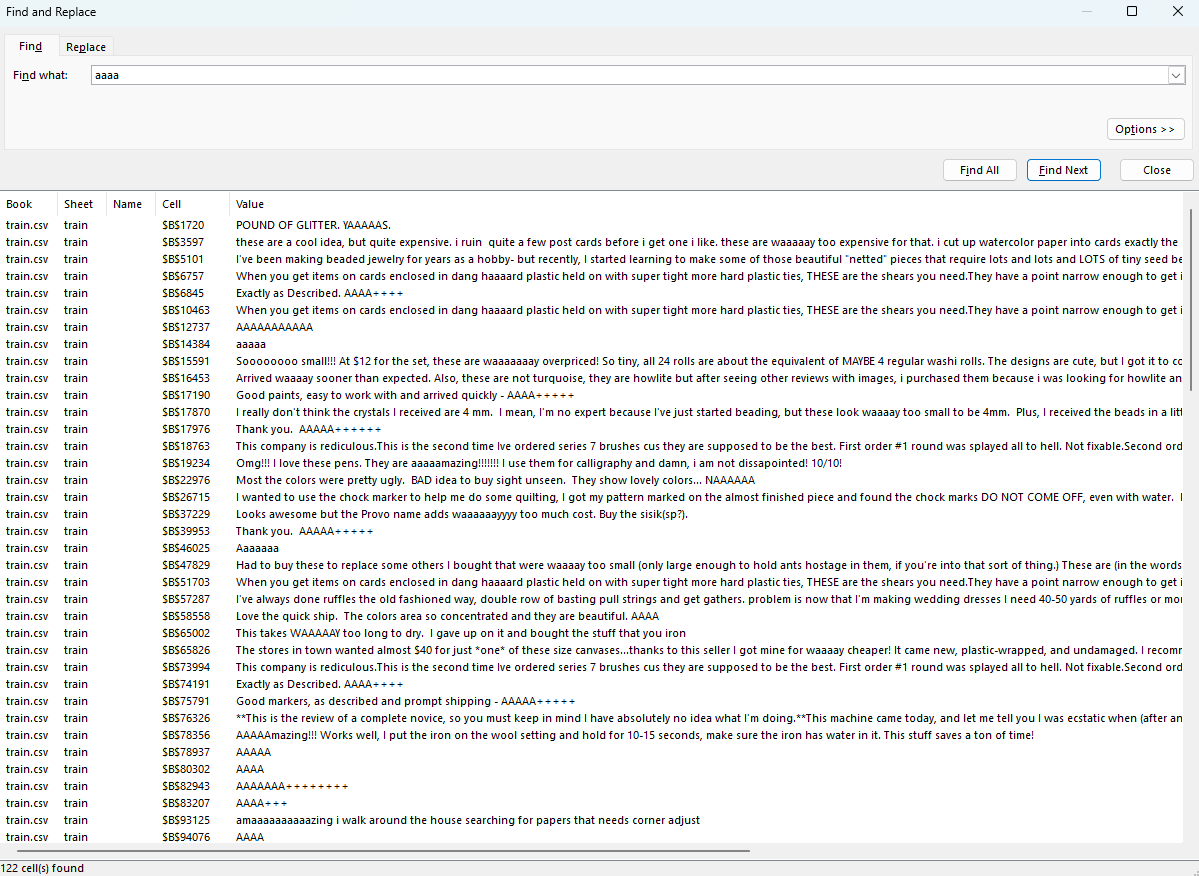

After examining the word cloud, we noticed that the term `aaaa` appeared prominently, indicating its frequency and significance in the five-star ratings. Intrigued, we conducted a search for the term `aaaa` within the `train.csv` file using Excel and found it in 122 cells.


The term was predominantly used in two contexts: first, when reviewers awarded `AAAAA` ratings to express their satisfaction with the products, and second, when they employed words like `waaaay`, `aaaaamazing`, `amaaaaaaazing`, and `haaaaaard` to convey their feelings in a hyperbolic manner. This suggests that `aaaa` serves as a marker for extreme satisfaction or exaggerated expressions in the reviews.

# Conclusion

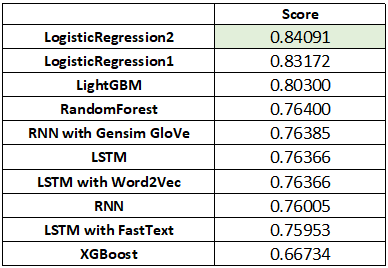

**Analysis**
* The table above summarises all the successful experimented models with their performance.
* It is evident that `logistic regression` models achieved the highest scores, with `0.84091` and `0.83172`, respectively.
* `LightGBM`, a gradient boosting framework, also demonstrated competitive performance with a score of `0.80300`.
* In contrast, `sequence models` achieved lower scores ranging from `0.75953` to `0.76385`.

## Findings

**N-gram Features**
* Utilising n-gram features has the potential to enhance model performance by augmenting the dataset with additional text variations, ranging from `unigrams` to `trigrams`.
* This expanded dataset allows the model to capture more `comprehensive patterns` and nuances in the text, thereby improving its learning capabilities.
* However, the creation of n-gram features results in `large`, `sparse matrices`, which can significantly prolong training times and, in some cases, cause session crashes due to memory constraints.

**Word Embeddings**
* The performance of `LSTM` models `with` pretrained word embeddings is the same as or lower than the performance `without` pretrained word embeddings.
* Training word embeddings on the same dataset used for the LSTM models might not provide additional useful information. The LSTM models might learn better representations directly from the raw text data, rather than relying on the embeddings.
* However, the RNN model with GloVe embeddings from Gensim slightly improved compared to model without pretrained embeddings, it suggests that GloVe embeddings might capture some useful semantic information from the text data. We may fine-tuning the GloVe embeddings during model training to adapt them more closely to our specific task and dataset.

**Large Dataset**
* Dealing with large training datasets poses significant challenges, particularly when training `complex models` like RNNs, LSTMs, and pretrained models.
* The process of `vectorising` the extensive training data into a format suitable for neural networks consumes considerable memory, often leading to session crashes due to memory limitations.
* Similarly, `fitting` the large training dataset and `predicting` on the extensive test data can also overwhelm available RAM, resulting in session crashes.
* To address these issues, we need to handle the data in smaller, manageable chunks. However, `vectorising` the data incrementally is challenging because traditional vectorisers do not retain information from previous data chunks.
* Moreover, training on large datasets is time-consuming, leading to longer training times.
* To mitigate this, we may need to reduce the number of `epochs` during training, which can potentially impact model performance.

**BoW Models vs. Text as A Sequence Models**
* BoW models are efficient in handling large volumes of text data and are well-suited for processing extensive datasets. They offer computational efficiency and intuitive representation, making them suitable for large-scale text classification tasks.
* On the other hand, sequence models have the potential to capture intricate patterns and semantic relationships within the text, potentially resulting in higher classification accuracy compared to BoW models. However, sequence models often demand more computational resources and larger training datasets.
* Given our limited computational resources and the relatively simpler nature of the task — classifying review ratings with an average of around 200 words — BoW models have outperformed sequence models in our scenario.

# Extra: Making Submission on Kaggle

In this section, we provide a list of the submissions that have been made to Kaggle, along with details of the complete train-test pipeline.

## Logistic Regression Model 1

`LogisticRegression(C=0.1, solver='liblinear')`

Public Score: 0.83172

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

train = pd.read_csv('preprocessed_train.csv')
train.fillna("", inplace=True)

count = CountVectorizer(binary=True, ngram_range=(1,3))
X_train = count.fit_transform(train['Preprocessed_Review'])

model = LogisticRegression(C=0.1, solver='liblinear')
model.fit(X_train, train.overall)

test = pd.read_csv('test.csv')
test.fillna("", inplace=True)

x_test = count.transform(test['Review'])
yy = model.predict(x_test)

sample = pd.read_csv('sample_submission.csv') # submission of majority class
sample['overall'] = yy # save the labels for your model to csv file, you will use this for you Kaggle competition submission

sample.to_csv('lr_trigram_pre.csv', index=False)
view_submitted=pd.read_csv('lr_trigram_pre.csv')
view_submitted.describe()

## Logistic Regression Model 2

`LogisticRegression(C=1, solver='liblinear', max_iter=10000)`

Public Score: 0.84091

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/F20AA_CW2/preprocessed_train.csv')
train.fillna("", inplace=True)

test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/F20AA_CW2/preprocessed_test.csv')
test.fillna("", inplace=True)

count = CountVectorizer(binary=True, ngram_range=(1,3))
X_train = count.fit_transform(train['Preprocessed_Review'])

model = LogisticRegression(C=1, solver='liblinear', max_iter=10000)
model.fit(X_train, train.overall)

x_test = count.transform(test['Preprocessed_Review'])
yy = model.predict(x_test)

In [ ]:
sample = pd.read_csv('sample_submission.csv')
sample['overall'] = yy

sample.to_csv('lr_c1_trigram_pre.csv', index=False)

view_submitted=pd.read_csv('lr_c1_trigram_pre.csv')
view_submitted.describe()

,id,overall
count,123622.000000,123622.000000
mean,61810.500000,4.690913
std,35686.741826,0.835030
min,0.000000,1.000000
25%,30905.250000,5.000000
50%,61810.500000,5.000000
75%,92715.750000,5.000000
max,123621.000000,5.000000


## XGBoost

Public Score: 0.66734

In [ ]:
test = pd.read_csv('preprocessed_test.csv')
test.fillna("", inplace=True)

In [ ]:
X_test_CV = vectorizer.transform(test['Preprocessed_Review'])
xg_test = xgb.DMatrix(X_test_CV)
yy = xgb_classifier.predict(xg_test)

In [ ]:
def map_to_class(value):
    min_value = -1.092509
    max_value = 4.974090

    interval_width = (max_value - min_value) / 5

    if value <= min_value + interval_width:
        return 1
    elif value <= min_value + (2 * interval_width):
        return 2
    elif value <= min_value + (3 * interval_width):
        return 3
    elif value <= min_value + (4 * interval_width):
        return 4
    else:
        return 5

In [ ]:
y_pred = []
for i in yy:
    y_pred.append(map_to_class(i))

In [ ]:
sample = pd.read_csv('sample_submission.csv')
sample['overall'] = y_pred

sample.to_csv('xgb_1.csv', index=False)

view_submitted=pd.read_csv('xgb_1.csv')
view_submitted.describe()

,id,overall
count,123622.000000,123622.000000
mean,61810.500000,4.700231
std,35686.741826,0.622157
min,0.000000,1.000000
25%,30905.250000,5.000000
50%,61810.500000,5.000000
75%,92715.750000,5.000000
max,123621.000000,5.000000


## RNN

Public Score: 0.76005

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 100)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 100, 300)          11247300  
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               54912     
                                                                 
 dense (Dense)               (None, 5)                 645       
                                                                 
Total params: 11302857 (43.12 MB)
Trainable params: 11302857 (43.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
import numpy as np

def predict_chunk(chunk):
    chunk.fillna("", inplace=True)
    X_test_raw = chunk['Preprocessed_Review'].tolist()
    predictions_chunk = model.predict(X_test_raw)
    return predictions_chunk

all_predictions = []

for chunk in pd.read_csv('/content/drive/MyDrive/Colab Notebooks/F20AA_CW2/preprocessed_test.csv', chunksize=10000):
    predictions_chunk = predict_chunk(chunk)
    all_predictions.append(predictions_chunk)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
114/114 [==============================] - 3s 22ms/step


In [ ]:
all_predictions_concat = np.concatenate(all_predictions)
predicted_labels = np.argmax(all_predictions_concat, axis=1) + 1

In [ ]:
sample = pd.read_csv('sample_submission.csv')
sample['overall'] = predicted_labels

sample.to_csv('rnn_basic.csv', index=False)

view_submitted=pd.read_csv('rnn_basic.csv')
view_submitted.describe()

,id,overall
count,123622.000000,123622.000000
mean,61810.500000,4.976533
std,35686.741826,0.218740
min,0.000000,1.000000
25%,30905.250000,5.000000
50%,61810.500000,5.000000
75%,92715.750000,5.000000
max,123621.000000,5.000000


## LSTM

Public Score: 0.76366

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (Text  (None, 100)               0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 100, 300)          11247300  
                                                                 
 lstm (LSTM)                 (None, 100, 128)          219648    
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
import numpy as np

def predict_chunk(chunk):
    chunk.fillna("", inplace=True)
    X_test_raw = chunk['Preprocessed_Review'].tolist()
    predictions_chunk = model.predict(X_test_raw)
    return predictions_chunk

all_predictions = []

for chunk in pd.read_csv('/content/drive/MyDrive/Colab Notebooks/F20AA_CW2/preprocessed_test.csv', chunksize=10000):
    predictions_chunk = predict_chunk(chunk)
    all_predictions.append(predictions_chunk)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
114/114 [==============================] - 14s 126ms/step


In [ ]:
all_predictions_concat = np.concatenate(all_predictions)
predicted_labels = np.argmax(all_predictions_concat, axis=1) + 1

In [ ]:
sample = pd.read_csv('sample_submission.csv')
sample['overall'] = predicted_labels

sample.to_csv('lstm_basic.csv', index=False)

view_submitted=pd.read_csv('lstm_basic.csv')
view_submitted.describe()

,id,overall
count,123622.000000,123622.0
mean,61810.500000,5.0
std,35686.741826,0.0
min,0.000000,5.0
25%,30905.250000,5.0
50%,61810.500000,5.0
75%,92715.750000,5.0
max,123621.000000,5.0


## LSTM with Word2Vec

Public Score: 0.76366

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 300)          21757500  
                                                                 
 lstm_4 (LSTM)               (None, 100, 128)          219648    
                                                                 
 dropout_6 (Dropout)         (None, 100, 128)          0         
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dropout_8 (Dropout)         (None, 32)               

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
import numpy as np

def predict_chunk(chunk):
    chunk.fillna("", inplace=True)
    X_test_raw = chunk['Preprocessed_Review']
    X_test_raw = X_test_raw.apply(preprocess)
    X_test_raw = tokenizer.texts_to_sequences(X_test_raw)
    X_test_raw = pad_sequences(X_test_raw, maxlen=max_length, padding='post')
    predictions_chunk = model.predict(X_test_raw)
    return predictions_chunk

all_predictions = []

for chunk in pd.read_csv('/content/drive/MyDrive/Colab Notebooks/F20AA_CW2/preprocessed_test.csv', chunksize=10000):
    predictions_chunk = predict_chunk(chunk)
    all_predictions.append(predictions_chunk)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
114/114 [==============================] - 16s 136ms/step


In [ ]:
all_predictions_concat = np.concatenate(all_predictions)
predicted_labels = np.argmax(all_predictions_concat, axis=1) + 1

In [ ]:
sample = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/F20AA_CW2/sample_submission.csv')
sample['overall'] = predicted_labels

sample.to_csv('lstm_word2vec.csv', index=False)

view_submitted=pd.read_csv('lstm_word2vec.csv')
view_submitted.describe()

,id,overall
count,123622.000000,123622.0
mean,61810.500000,5.0
std,35686.741826,0.0
min,0.000000,5.0
25%,30905.250000,5.0
50%,61810.500000,5.0
75%,92715.750000,5.0
max,123621.000000,5.0


## LSTM with FastText

Public Score: 0.75953

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          21757500  
                                                                 
 lstm (LSTM)                 (None, 100, 128)          219648    
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
import numpy as np

def predict_chunk(chunk):
    chunk.fillna("", inplace=True)
    X_test_raw = chunk['Preprocessed_Review']
    X_test_raw = X_test_raw.apply(preprocess)
    X_test_raw = tokenizer.texts_to_sequences(X_test_raw)
    X_test_raw = pad_sequences(X_test_raw, maxlen=max_length, padding='post')
    predictions_chunk = model.predict(X_test_raw)
    return predictions_chunk

all_predictions = []

for chunk in pd.read_csv('/content/drive/MyDrive/Colab Notebooks/F20AA_CW2/preprocessed_test.csv', chunksize=10000):
    predictions_chunk = predict_chunk(chunk)
    all_predictions.append(predictions_chunk)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
114/114 [==============================] - 12s 105ms/step


In [ ]:
all_predictions_concat = np.concatenate(all_predictions)
predicted_labels = np.argmax(all_predictions_concat, axis=1) + 1

In [ ]:
sample = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/F20AA_CW2/sample_submission.csv')
sample['overall'] = predicted_labels

sample.to_csv('lstm_fasttext.csv', index=False)

view_submitted=pd.read_csv('lstm_fasttext.csv')
view_submitted.describe()

,id,overall
count,123622.000000,123622.000000
mean,61810.500000,4.985003
std,35686.741826,0.182386
min,0.000000,1.000000
25%,30905.250000,5.000000
50%,61810.500000,5.000000
75%,92715.750000,5.000000
max,123621.000000,5.000000


## RNN with Gensim GloVe

Public Score: 0.76385

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 300)          21757500  
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               54912     
                                                                 
 dense_3 (Dense)             (None, 5)                 645       
                                                                 
Total params: 21813057 (83.21 MB)
Trainable params: 55557 (217.02 KB)
Non-trainable params: 21757500 (83.00 MB)
_________________________________________________________________


In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
import numpy as np

def predict_chunk(chunk):
    chunk.fillna("", inplace=True)
    X_test_raw = chunk['Preprocessed_Review']
    X_test_raw = X_test_raw.apply(preprocess)
    X_test_raw = tokenizer.texts_to_sequences(X_test_raw)
    X_test_raw = pad_sequences(X_test_raw, maxlen=max_length, padding='post')
    predictions_chunk = model.predict(X_test_raw)
    return predictions_chunk

all_predictions = []

for chunk in pd.read_csv('/content/drive/MyDrive/Colab Notebooks/F20AA_CW2/preprocessed_test.csv', chunksize=10000):
    predictions_chunk = predict_chunk(chunk)
    all_predictions.append(predictions_chunk)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
114/114 [==============================] - 2s 16ms/step


In [ ]:
all_predictions_concat = np.concatenate(all_predictions)
predicted_labels = np.argmax(all_predictions_concat, axis=1) + 1

In [ ]:
sample = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/F20AA_CW2/sample_submission.csv')
sample['overall'] = predicted_labels

sample.to_csv('rnn_glove.csv', index=False)

view_submitted=pd.read_csv('rnn_glove.csv')
view_submitted.describe()

,id,overall
count,123622.000000,123622.000000
mean,61810.500000,4.999199
std,35686.741826,0.039299
min,0.000000,1.000000
25%,30905.250000,5.000000
50%,61810.500000,5.000000
75%,92715.750000,5.000000
max,123621.000000,5.000000


In [ ]:
model.summary()

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
import numpy as np

test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/F20AA_CW2/preprocessed_test.csv')
test.fillna("", inplace=True)

test_encodings = tokenizer(test['Preprocessed_Review'].tolist(), truncation=True, padding=True)
test_dataset = tf.data.Dataset.from_tensor_slices(dict(test_encodings))
test_dataset = test_dataset.batch(32)

yy = model.predict(test_dataset).logits.argmax(axis=1).tolist()

In [ ]:
sample = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/F20AA_CW2/sample_submission.csv')
sample['overall'] = yy

sample.to_csv('distilbert.csv', index=False)

view_submitted=pd.read_csv('distilbert.csv')
view_submitted.describe()